In [1]:
import pandas as pd

# headers
col_Names=["age", "sex", "on_thyroxine", "query_on_thyroxine","on_antithyroid_medication", "sick", "pregnant", "thyroid_surgery", \
           "I131_treatment", "query_hypothyroid", "query_hyperthyroid","lithium", "goitre", "tumor", "hypopituitary",\
          "psych", "TSH_measured", "TSH", "T3_measured","T3", "TT4_measured", "TT4", "T4U_measured",\
          "T4U", "FTI_measured", "FTI", "TBG_measured","TBG","referral_source","thyroid_result"]
# read data
df = pd.read_csv (r'sick.data',names=col_Names)
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... TT4_measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U_measured   T4U FTI_measured  FTI TBG_measured TBG referral_source  \
0  125            t  1.14            t  109            f   ?            SVHC   
1  102            f     ?            f    ?            f   ?           other   
2  109            t  0.91            t  120            f   ?           other   
3  175            f     ?            f    ?            f   ?           other   
4   61            t  0.87            t   70            f   ?             SVI   

   thyroid_result  
0  negative.|3733  
1  negative.|1442  
2  negative.|2965  
3   negative.|806  
4  negative.|2807  

[5 rows x 30 columns]

In [2]:
# split thyroid_result column
df[['thyroid_result', 'remove_this_column']] = df['thyroid_result'].str.split('.', 1, expand=True)

In [3]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ...  TT4  \
0        f               f              f                 f  ...  125   
1        f               f              f                 f  ...  102   
2        f               f              f                 f  ...  109   
3        f               f              f                 f  ...  175   
4        f               f              f                 f  ...   61   

  T4U_measured   T4U FTI_measured  FTI TBG_measured TBG referral_source  \
0            t  1.14            t  109            f   ?            SVHC   
1            f     ?            f    ?            f   ?           other   
2            t  0.91            t  120            f   ?           other   
3            f     ?            f    ?            f   ?           other   
4            t  0.87            t   70            f   ?             SVI   

  thyroid_result remove_this_column  
0       negative              |3733  
1       negative              |1442  
2       negative              |2965  
3       negative               |806  
4       negative              |2807  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on_thyroxine               2800 non-null   object
 3   query_on_thyroxine         2800 non-null   object
 4   on_antithyroid_medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid_surgery            2800 non-null   object
 8   I131_treatment             2800 non-null   object
 9   query_hypothyroid          2800 non-null   object
 10  query_hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [5]:
# create list of catogrical variables
unique_list=["sex", "on_thyroxine", "query_on_thyroxine","on_antithyroid_medication", "sick", "pregnant", "thyroid_surgery",\
  "I131_treatment", "query_hypothyroid", "query_hyperthyroid","lithium", "goitre", "tumor", "hypopituitary",\
  "psych", "TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured","thyroid_result"]

# check if there is any in-valid data
for col in unique_list:
    print(df[col].value_counts())


F    1830
M     860
?     110
Name: sex, dtype: int64
f    2470
t     330
Name: on_thyroxine, dtype: int64
f    2760
t      40
Name: query_on_thyroxine, dtype: int64
f    2766
t      34
Name: on_antithyroid_medication, dtype: int64
f    2690
t     110
Name: sick, dtype: int64
f    2759
t      41
Name: pregnant, dtype: int64
f    2761
t      39
Name: thyroid_surgery, dtype: int64
f    2752
t      48
Name: I131_treatment, dtype: int64
f    2637
t     163
Name: query_hypothyroid, dtype: int64
f    2627
t     173
Name: query_hyperthyroid, dtype: int64
f    2786
t      14
Name: lithium, dtype: int64
f    2775
t      25
Name: goitre, dtype: int64
f    2729
t      71
Name: tumor, dtype: int64
f    2799
t       1
Name: hypopituitary, dtype: int64
f    2665
t     135
Name: psych, dtype: int64
t    2516
f     284
Name: TSH_measured, dtype: int64
t    2215
f     585
Name: T3_measured, dtype: int64
t    2616
f     184
Name: TT4_measured, dtype: int64
t    2503
f     297
Name: T4U_measured, dtype: 

In [6]:
# all data in TBG col is "?"
# drop columns those are not required
df=df.drop(columns=['referral_source', 'remove_this_column',"TBG","TBG_measured"])

In [7]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ...   TSH  \
0        f               f              f                 f  ...   1.3   
1        f               f              f                 f  ...   4.1   
2        f               f              f                 f  ...  0.98   
3        f               f              f                 f  ...  0.16   
4        f               f              f                 f  ...  0.72   

  T3_measured   T3 TT4_measured  TT4 T4U_measured   T4U FTI_measured  FTI  \
0           t  2.5            t  125            t  1.14            t  109   
1           t    2            t  102            f     ?            f    ?   
2           f    ?            t  109            t  0.91            t  120   
3           t  1.9            t  175            f     ?            f    ?   
4           t  1.2            t   61            t  0.87            t   70   

  thyroid_result  
0       negative  
1       negative  
2       negative  
3       negative  
4       negative  

[5 rows x 27 columns]

In [8]:
# remove rows where sex =?(invalid data)-110 rows
df = df[(df.sex != "?")]

In [9]:
# verify after removing invalid data
print(df["sex"].value_counts())

F    1830
M     860
Name: sex, dtype: int64


In [10]:
import numpy as np

# replace ? with mean data 
num_col_list =["age","TSH","T3","TT4","T4U","FTI"]
for col in num_col_list:
    df[col] = df[col].replace('?', np.round(np.mean(pd.to_numeric(df[col], errors='coerce')),2))
#     df[col] = pd.to_numeric(df[col])

In [11]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ...   TSH  \
0        f               f              f                 f  ...   1.3   
1        f               f              f                 f  ...   4.1   
2        f               f              f                 f  ...  0.98   
3        f               f              f                 f  ...  0.16   
4        f               f              f                 f  ...  0.72   

  T3_measured    T3 TT4_measured  TT4 T4U_measured   T4U FTI_measured     FTI  \
0           t   2.5            t  125            t  1.14            t     109   
1           t     2            t  102            f   1.0            f  110.71   
2           f  2.02            t  109            t  0.91            t     120   
3           t   1.9            t  175            f   1.0            f  110.71   
4           t   1.2            t   61            t  0.87            t      70   

  thyroid_result  
0       negative  
1       negative  
2       negative  
3       negative  
4       negative  

[5 rows x 27 columns]

In [12]:
# convert categorical data into numerical data
convert_tf = {'t': 1,'f': 0}
convert_list=["on_thyroxine", "query_on_thyroxine","on_antithyroid_medication", "sick", "pregnant", "thyroid_surgery",\
  "I131_treatment", "query_hypothyroid", "query_hyperthyroid","lithium", "goitre", "tumor", "hypopituitary",\
  "psych", "TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]

for col in convert_list:
    df[col] = [convert_tf[item] for item in df[col]]

convert_sex = {'M': 1,'F': 0}
df["sex"] = [convert_sex[item] for item in df["sex"]]

convert_result = {'negative': 0,'sick': 1}
df["thyroid_result"] = [convert_result[item] for item in df["thyroid_result"]]

In [13]:
df.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  sick  \
0  41    0             0                   0                          0     0   
1  23    0             0                   0                          0     0   
2  46    1             0                   0                          0     0   
3  70    0             1                   0                          0     0   
4  70    0             0                   0                          0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...   TSH  \
0         0                0               0                  0  ...   1.3   
1         0                0               0                  0  ...   4.1   
2         0                0               0                  0  ...  0.98   
3         0                0               0                  0  ...  0.16   
4         0                0               0                  0  ...  0.72   

   T3_measured    T3  TT4_measured  TT4  T4U_measured   T4U FTI_measured  \
0            1   2.5             1  125             1  1.14            1   
1            1     2             1  102             0   1.0            0   
2            0  2.02             1  109             1  0.91            1   
3            1   1.9             1  175             0   1.0            0   
4            1   1.2             1   61             1  0.87            1   

      FTI thyroid_result  
0     109              0  
1  110.71              0  
2     120              0  
3  110.71              0  
4      70              0  

[5 rows x 27 columns]

In [14]:
# add all col list to a data frame
all_col_list = df.columns.values.tolist()

# convert all columns to numeric
for col in all_col_list:
    df[col] = pd.to_numeric(df[col])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690 entries, 0 to 2799
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2690 non-null   float64
 1   sex                        2690 non-null   int64  
 2   on_thyroxine               2690 non-null   int64  
 3   query_on_thyroxine         2690 non-null   int64  
 4   on_antithyroid_medication  2690 non-null   int64  
 5   sick                       2690 non-null   int64  
 6   pregnant                   2690 non-null   int64  
 7   thyroid_surgery            2690 non-null   int64  
 8   I131_treatment             2690 non-null   int64  
 9   query_hypothyroid          2690 non-null   int64  
 10  query_hyperthyroid         2690 non-null   int64  
 11  lithium                    2690 non-null   int64  
 12  goitre                     2690 non-null   int64  
 13  tumor                      2690 non-null   int64

In [16]:
df.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0  41.0    0             0                   0                          0   
1  23.0    0             0                   0                          0   
2  46.0    1             0                   0                          0   
3  70.0    0             1                   0                          0   
4  70.0    0             0                   0                          0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

    TSH  T3_measured    T3  TT4_measured    TT4  T4U_measured   T4U  \
0  1.30            1  2.50             1  125.0             1  1.14   
1  4.10            1  2.00             1  102.0             0  1.00   
2  0.98            0  2.02             1  109.0             1  0.91   
3  0.16            1  1.90             1  175.0             0  1.00   
4  0.72            1  1.20             1   61.0             1  0.87   

   FTI_measured     FTI  thyroid_result  
0             1  109.00               0  
1             0  110.71               0  
2             1  120.00               0  
3             0  110.71               0  
4             1   70.00               0  

[5 rows x 27 columns]

In [17]:
# check description of all the columns
df.describe(include="all").T
# for col in all_col_list:
#     print(df[col].describe())

count        mean        std    min    25%  \
age                        2690.0   51.908145  20.500599  1.000  36.00   
sex                        2690.0    0.319703   0.466448  0.000   0.00   
on_thyroxine               2690.0    0.119703   0.324674  0.000   0.00   
query_on_thyroxine         2690.0    0.014870   0.121055  0.000   0.00   
on_antithyroid_medication  2690.0    0.012639   0.111733  0.000   0.00   
sick                       2690.0    0.040149   0.196344  0.000   0.00   
pregnant                   2690.0    0.014870   0.121055  0.000   0.00   
thyroid_surgery            2690.0    0.014498   0.119554  0.000   0.00   
I131_treatment             2690.0    0.016729   0.128277  0.000   0.00   
query_hypothyroid          2690.0    0.059480   0.236564  0.000   0.00   
query_hyperthyroid         2690.0    0.062454   0.242022  0.000   0.00   
lithium                    2690.0    0.005204   0.071967  0.000   0.00   
goitre                     2690.0    0.009294   0.095973  0.000   0.00   
tumor                      2690.0    0.026022   0.159231  0.000   0.00   
hypopituitary              2690.0    0.000372   0.019281  0.000   0.00   
psych                      2690.0    0.049814   0.217601  0.000   0.00   
TSH_measured               2690.0    0.899257   0.301045  0.000   1.00   
TSH                        2690.0    4.514225  18.633441  0.005   0.59   
T3_measured                2690.0    0.788104   0.408727  0.000   1.00   
T3                         2690.0    2.021004   0.732441  0.050   1.70   
TT4_measured               2690.0    0.936059   0.244692  0.000   1.00   
TT4                        2690.0  109.065963  34.265351  2.000  89.00   
T4U_measured               2690.0    0.895911   0.305433  0.000   1.00   
T4U                        2690.0    0.998422   0.184380  0.310   0.89   
FTI_measured               2690.0    0.896654   0.304466  0.000   1.00   
FTI                        2690.0  110.707316  30.803784  2.000  95.00   
thyroid_result             2690.0    0.062082   0.241349  0.000   0.00   

                              50%     75%     max  
age                         54.00   67.00  455.00  
sex                          0.00    1.00    1.00  
on_thyroxine                 0.00    0.00    1.00  
query_on_thyroxine           0.00    0.00    1.00  
on_antithyroid_medication    0.00    0.00    1.00  
sick                         0.00    0.00    1.00  
pregnant                     0.00    0.00    1.00  
thyroid_surgery              0.00    0.00    1.00  
I131_treatment               0.00    0.00    1.00  
query_hypothyroid            0.00    0.00    1.00  
query_hyperthyroid           0.00    0.00    1.00  
lithium                      0.00    0.00    1.00  
goitre                       0.00    0.00    1.00  
tumor                        0.00    0.00    1.00  
hypopituitary                0.00    0.00    1.00  
psych                        0.00    0.00    1.00  
TSH_measured                 1.00    1.00    1.00  
TSH                          1.60    3.70  478.00  
T3_measured                  1.00    1.00    1.00  
T3                           2.02    2.20   10.60  
TT4_measured                 1.00    1.00    1.00  
TT4                        107.00  123.00  430.00  
T4U_measured                 1.00    1.00    1.00  
T4U                          1.00    1.07    2.12  
FTI_measured                 1.00    1.00    1.00  
FTI                        110.00  122.00  395.00  
thyroid_result               0.00    0.00    1.00

In [18]:
# remove invalid data in the age column
df = df[(df.age <= 120)]

In [19]:
# find the correlation
df.corr()

age       sex  on_thyroxine  \
age                        1.000000 -0.003240      0.012123   
sex                       -0.003240  1.000000     -0.088369   
on_thyroxine               0.012123 -0.088369      1.000000   
query_on_thyroxine        -0.016896  0.040884      0.001988   
on_antithyroid_medication -0.075761 -0.034781     -0.000732   
sick                       0.087979  0.001865     -0.052112   
pregnant                  -0.124431 -0.084262      0.011450   
thyroid_surgery           -0.035022 -0.043171      0.041484   
I131_treatment             0.054223 -0.027300      0.076895   
query_hypothyroid          0.028731 -0.034283      0.071858   
query_hyperthyroid        -0.039805 -0.071590     -0.019488   
lithium                   -0.032585 -0.027449      0.005150   
goitre                    -0.036352  0.024961     -0.011860   
tumor                     -0.019463 -0.072045     -0.031525   
hypopituitary             -0.031275  0.028128     -0.007114   
psych                     -0.088348  0.114120     -0.079203   
TSH_measured               0.118101  0.038860      0.039767   
TSH                       -0.040936 -0.035809      0.018965   
T3_measured                0.081699  0.096175     -0.159031   
T3                        -0.243113 -0.063912      0.023355   
TT4_measured               0.071822  0.074978      0.012155   
TT4                       -0.059194 -0.163630      0.207597   
T4U_measured               0.095660  0.045816      0.020736   
T4U                       -0.176602 -0.229220      0.048300   
FTI_measured               0.094450  0.046905      0.019901   
FTI                        0.041471 -0.031451      0.179283   
thyroid_result             0.170453  0.044897     -0.066434   

                           query_on_thyroxine  on_antithyroid_medication  \
age                                 -0.016896                  -0.075761   
sex                                  0.040884                  -0.034781   
on_thyroxine                         0.001988                  -0.000732   
query_on_thyroxine                   1.000000                  -0.013906   
on_antithyroid_medication           -0.013906                   1.000000   
sick                                 0.021803                  -0.023149   
pregnant                             0.035655                   0.068578   
thyroid_surgery                      0.010789                  -0.013728   
I131_treatment                      -0.016031                   0.011183   
query_hypothyroid                   -0.030908                  -0.014394   
query_hyperthyroid                  -0.006335                   0.122063   
lithium                             -0.008890                  -0.008187   
goitre                               0.052116                  -0.010963   
tumor                               -0.000796                  -0.018501   
hypopituitary                        0.156963                  -0.002183   
psych                               -0.028141                  -0.025916   
TSH_measured                        -0.122140                  -0.006340   
TSH                                 -0.009199                  -0.012030   
T3_measured                         -0.033982                   0.009830   
T3                                  -0.020051                   0.075459   
TT4_measured                         0.032123                  -0.038429   
TT4                                 -0.013852                   0.003810   
T4U_measured                         0.031836                  -0.037701   
T4U                                 -0.014579                   0.062561   
FTI_measured                         0.031636                  -0.038097   
FTI                                 -0.005154                  -0.036755   
thyroid_result                       0.019294                  -0.029120   

                               sick  pregnant  thyroid_surgery  \
age                        0.087979 -0.124431        -0.035022   
sex   

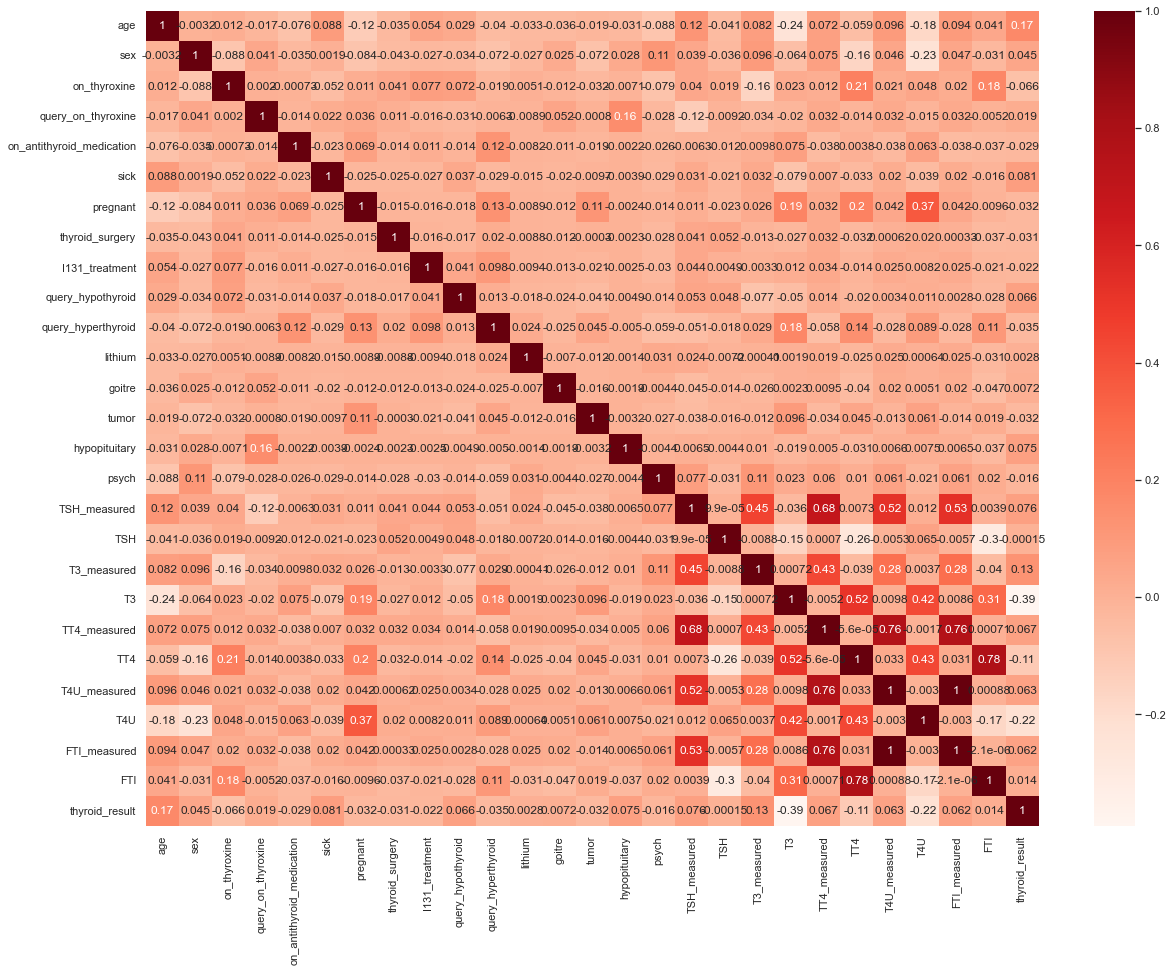

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

# plot the correlation
sns.set(rc={'figure.figsize':(20,15)})
#plot the correlation matrix of dataframe.
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

In [22]:
df.to_csv("intermediate.csv")